In [7]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [8]:
# Définir les chemins vers les fichiers de données
data_path = [
    "Data/janvier_data.xlsx",
    "Data/fevrier_data.xlsx",
    "Data/mars_data.xlsx",
    "Data/avril_data.xlsx",
    "Data/mai_data.xlsx",
    "Data/juin_data.xlsx",
]

In [9]:
# Charger et concaténer tous les fichiers
data = pd.concat([pd.read_excel(file) for file in data_path], ignore_index=True)

# Imputer les valeurs manquantes (remplace les NaN par la moyenne de la colonne)
imputer = SimpleImputer(strategy="mean")
data_imputed = data.copy()
data_imputed.iloc[:, 1:] = imputer.fit_transform(data.iloc[:, 1:])

In [10]:
# Standardiser les données (exclure la colonne Date)
X = data_imputed.drop(columns=["Date"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Prédire les anomalies (-1 : anomalie, 1 : normal)
data["Anomaly"] = ocsvm.predict(X_scaled)

# Filtrer et afficher les anomalies
anomalies = data[data["Anomaly"] == -1]
print(anomalies[["Date"] + [col for col in X.columns]])

In [11]:
# Initialiser et entraîner le modèle One-Class SVM
ocsvm = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)
ocsvm.fit(X_scaled)

OneClassSVM(gamma=0.1, nu=0.05)

In [12]:
# Prédire les anomalies (-1 : anomalie, 1 : normal)
data["Anomaly"] = ocsvm.predict(X_scaled)

# Filtrer et afficher les anomalies
anomalies = data[data["Anomaly"] == -1]
print(anomalies[["Date"] + [col for col in X.columns]])

     Date  4'' Gd  4'' Kab  6'' Kab  3'' Kab  24'' storage  6'' SC  PC-1
16     17     158       80     70.0     80.0            80    72.0    66
20     21     140       70     65.0     70.0            70    62.0    56
26     27     160      100     95.0    100.0           100    90.0    84
29     30     130       70     65.0     70.0            60    62.0    56
95      5     125       70      NaN      NaN            70     NaN    52
98      8     155       95      NaN      NaN           130     NaN    82
102    12     155      100      NaN      NaN            60     NaN    78
138    18     160      105      NaN      NaN            65     NaN    69


In [18]:
data

,Date,4'' Gd,4'' Kab,6'' Kab,3'' Kab,24'' storage,6'' SC,PC-1,Anomaly
0,1,145,85,80.0,85.0,80,72.0,66,1
1,2,140,80,75.0,80.0,75,72.0,66,1
2,3,145,80,75.0,80.0,75,72.0,66,1
3,4,140,80,70.0,75.0,70,70.0,63,1
4,5,155,90,80.0,85.0,80,79.0,71,1
...,...,...,...,...,...,...,...,...,...
177,26,135,75,NaN,NaN,70,NaN,60,1
178,27,145,90,NaN,NaN,90,NaN,70,1
179,28,135,85,NaN,NaN,70,NaN,70,1
180,29,165,105,NaN,NaN,100,NaN,87,1


In [19]:
data["Anomaly"].value_counts()

Anomaly
 1    174
-1      8
Name: count, dtype: int64

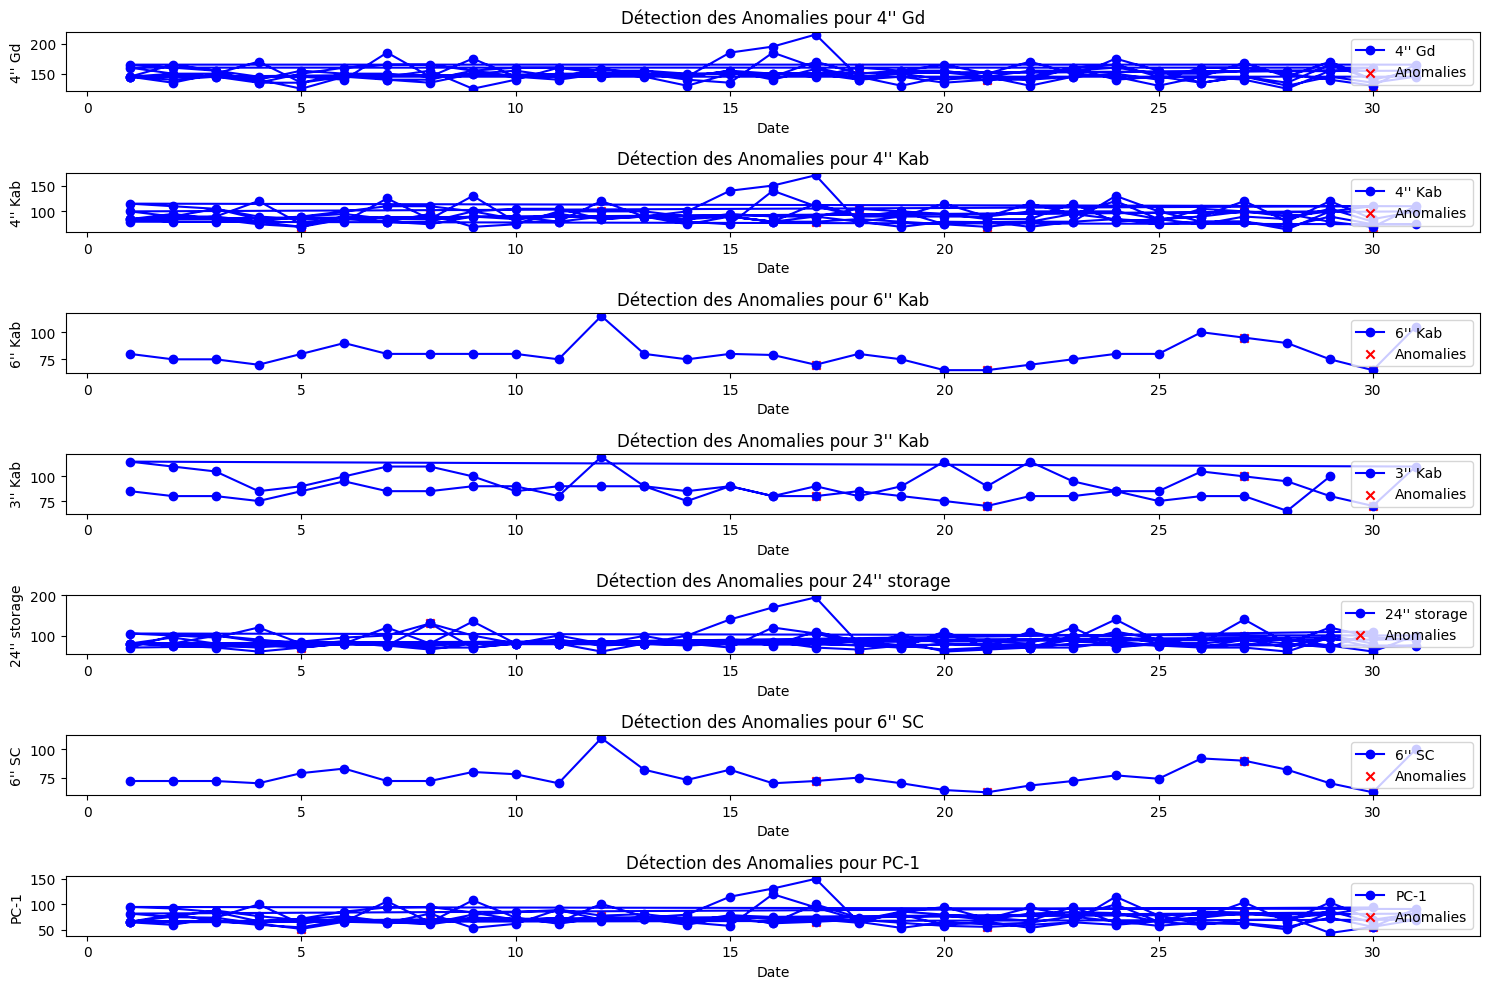

In [20]:
import matplotlib.pyplot as plt

# Visualiser les anomalies
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns, 1):
    plt.subplot(len(X.columns), 1, i)
    plt.plot(data["Date"], data[col], label=col, color="blue", marker="o")

    # Marquer les anomalies
    anomalies = data[data["Anomaly"] == -1]
    plt.scatter(
        anomalies["Date"], anomalies[col], color="red", label="Anomalies", marker="x"
    )

    plt.title(f"Détection des Anomalies pour {col}")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.legend()

plt.tight_layout()
plt.show()